# Test Result Analysis

Read all CSV from Report/**/Singles/** folder

In [6]:
import glob
from os import write
import traceback
from typing import Iterator
import pandas as pd

accumulatedFrame: pd.DataFrame = pd.DataFrame()
reportDirectory: str = '../Reports/'
fileIterator: Iterator = glob.iglob('**/Singles/**/*.csv', root_dir=reportDirectory, recursive=True)

for fileName in fileIterator:
    try:
        print('Reading ' + fileName + ' ...')
        csvFrame: pd.DataFrame = pd.read_csv(reportDirectory + fileName, low_memory=False, skiprows=[1, 2, 4, 6])
        durationStr: str = csvFrame['Duration'][1]
        durationNumberStr: str = durationStr.replace('s', '')
        durationFloat = float(durationNumberStr)

        inBrowserDictionary: dict = {
            'Test Case': [csvFrame['Suite/Test/Step Name'][0]],
            'Browser': [csvFrame['Browser'][1]],
            'Start Time': [csvFrame['Start time'][1]],
            'Duration': [durationFloat]
        }

        inBrowserFrame = pd.DataFrame(inBrowserDictionary)
        # print(inBrowserFrame)
        accumulatedFrame = pd.concat([accumulatedFrame, inBrowserFrame])
    except KeyError as err:
        print('Failed while reading ' + fileName)
        traceback.print_tb


print(accumulatedFrame)

Reading 20220823_180259\Singles\Katalon Shop Head - 0 Timeout\20220823_180300\20220823_180300.csv ...
Reading 20220823_180259\Singles\Katalon Shop Head - 30 Timeout\20220823_180302\20220823_180302.csv ...
Reading 20220823_180259\Singles\Katalon Shop Head - Simple XPath - 0 Timeout\20220823_180304\20220823_180304.csv ...
Reading 20220823_180259\Singles\Katalon Shop Head - Simple XPath - 30 Timeout\20220823_180306\20220823_180306.csv ...
Reading 20220823_180259\Singles\Katalon Shop Head - Simple XPath - Variable Timeout\20220823_180308\20220823_180308.csv ...
Reading 20220823_180259\Singles\Katalon Shop Head - Variable Timeout\20220823_180310\20220823_180310.csv ...
Reading 20220823_181159\Singles\Katalon Shop Head - 0 Timeout\20220823_181200\20220823_181200.csv ...
Reading 20220823_181159\Singles\Katalon Shop Head - 0 Timeout\20220823_181212\20220823_181212.csv ...
Reading 20220823_181159\Singles\Katalon Shop Head - 30 Timeout\20220823_181202\20220823_181202.csv ...
Reading 20220823_181

## Diagram

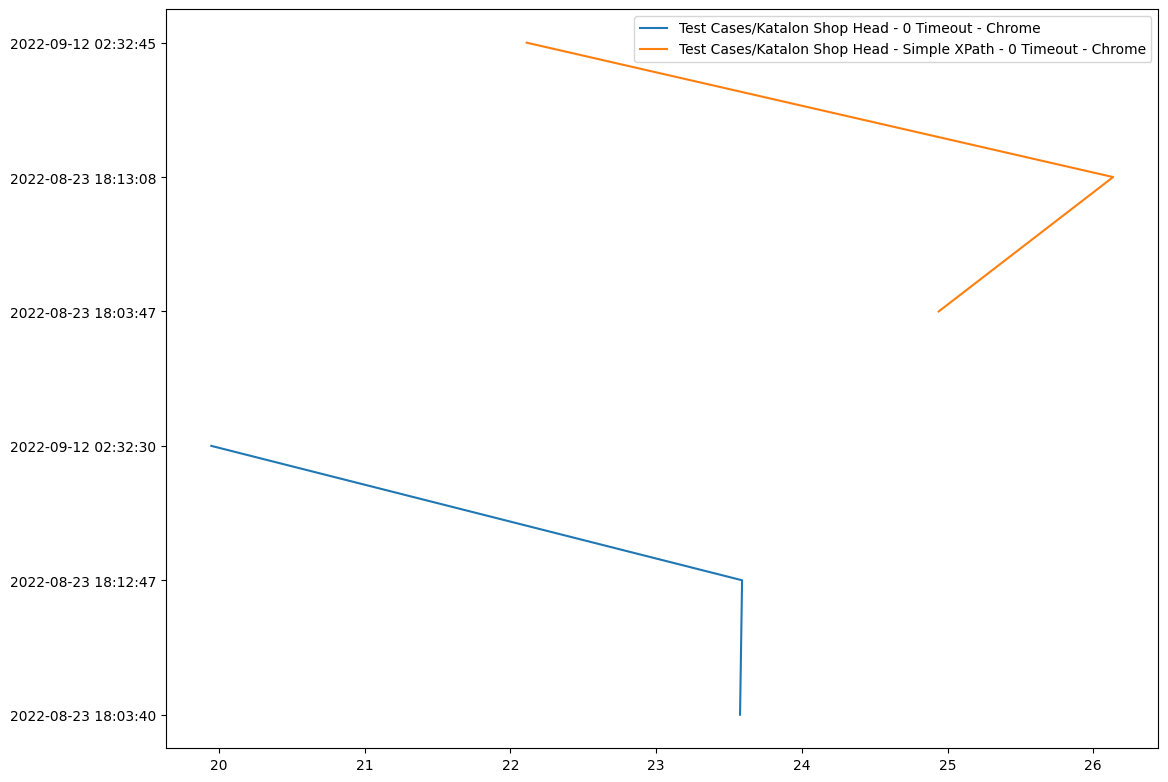

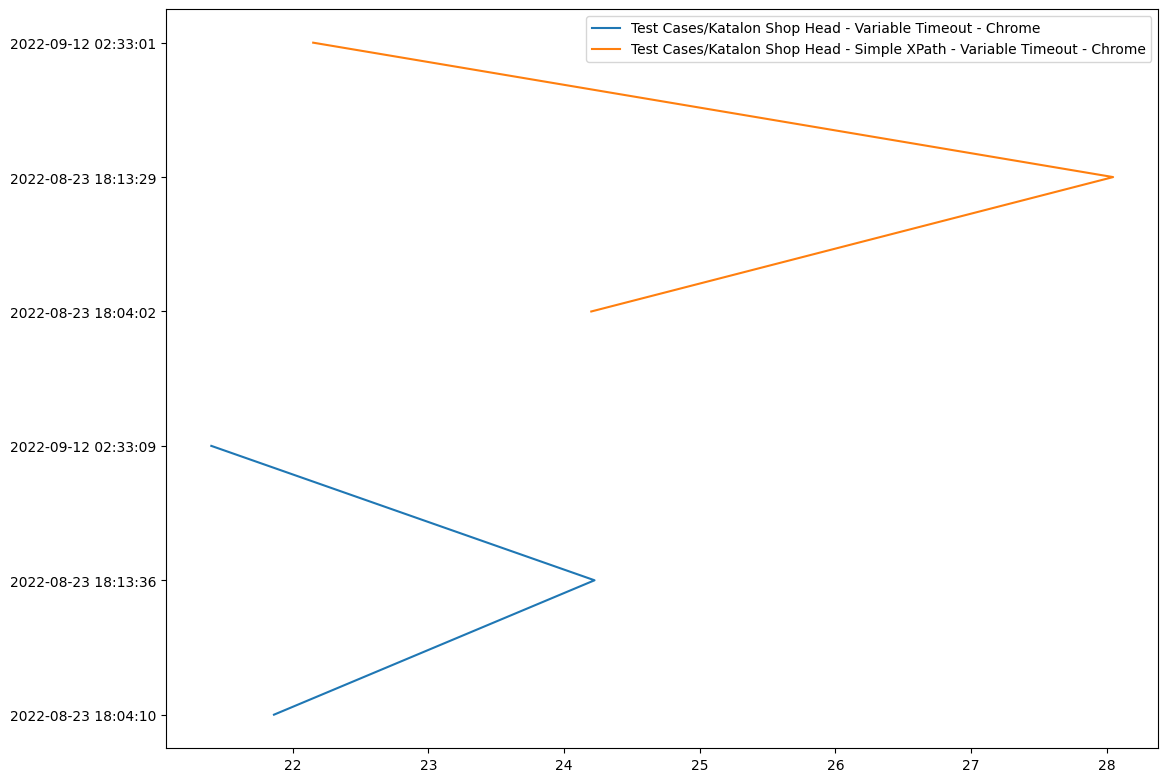

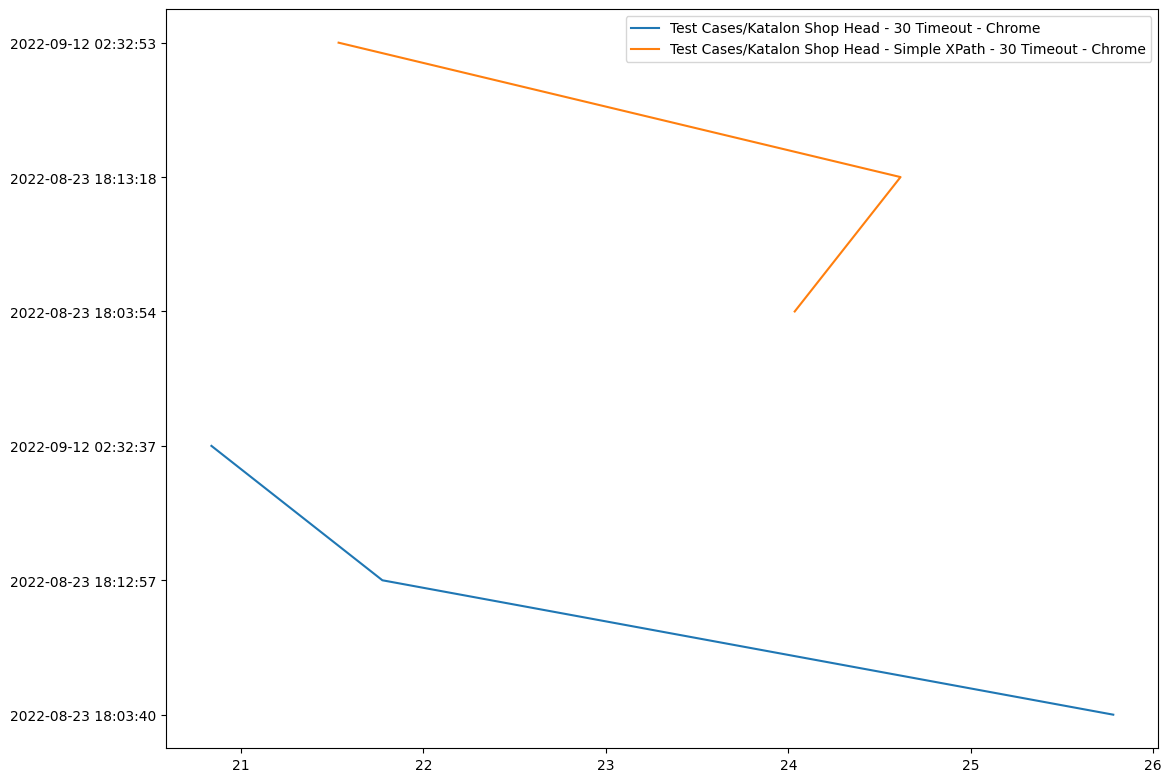

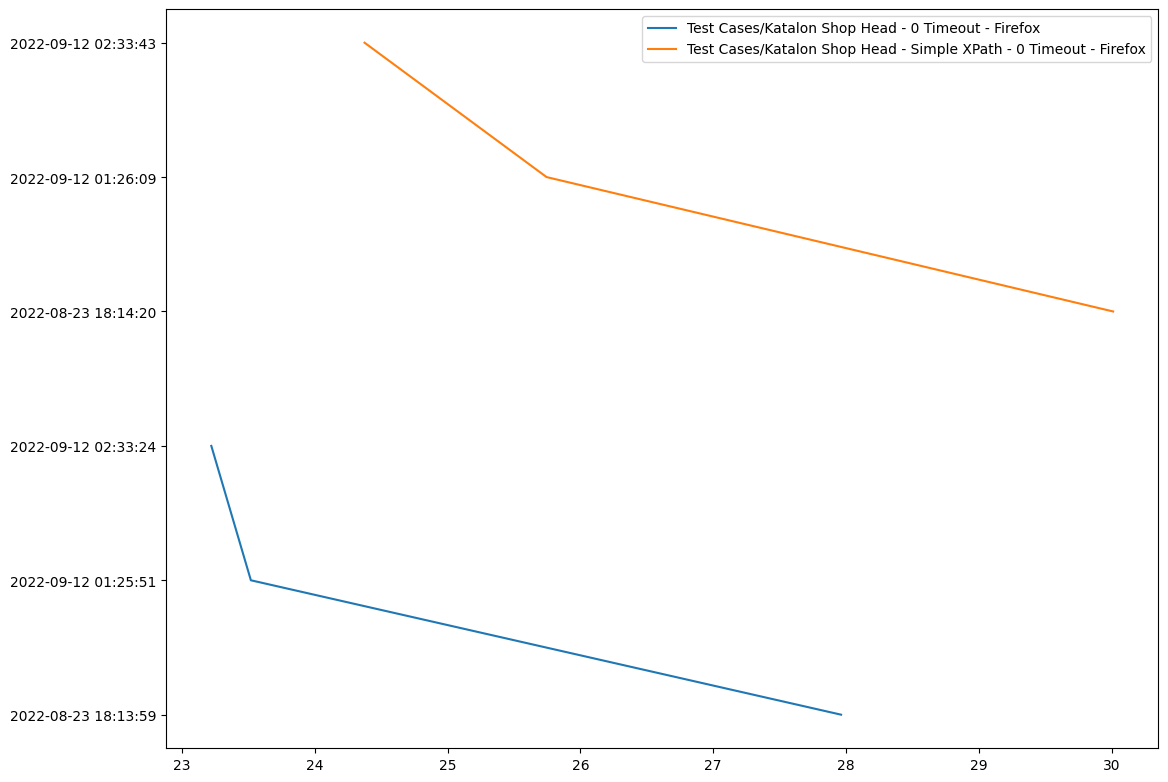

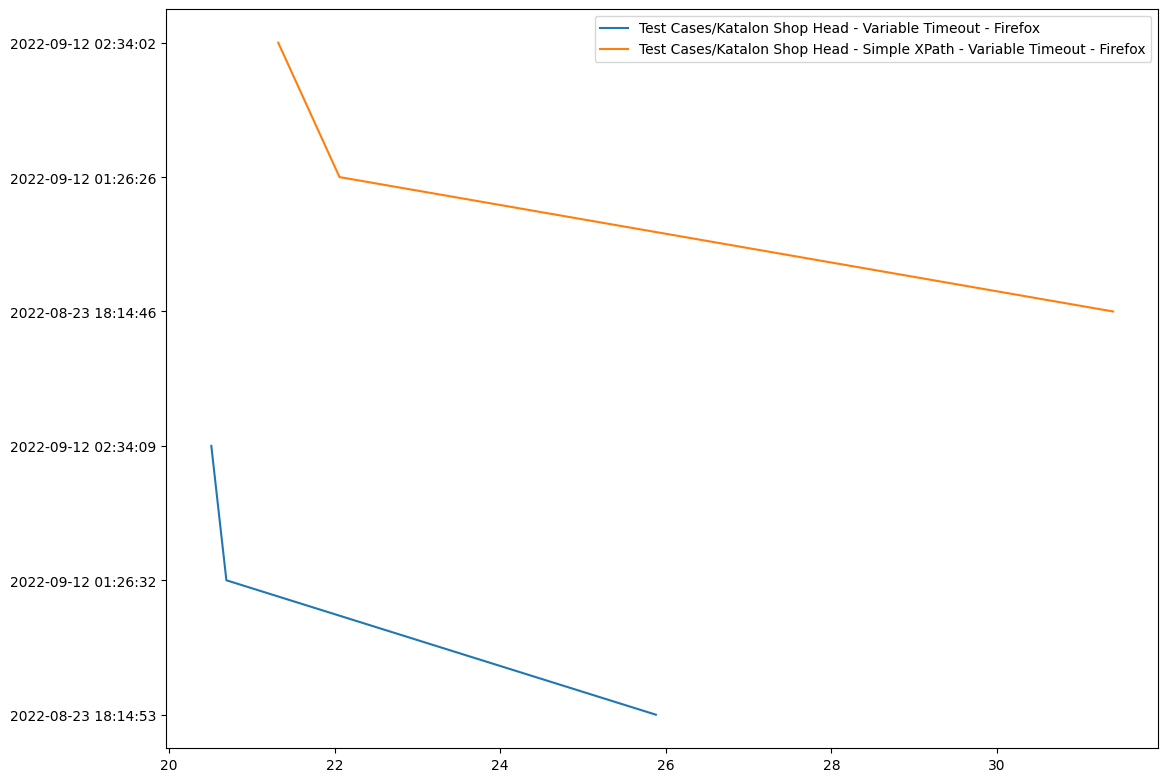

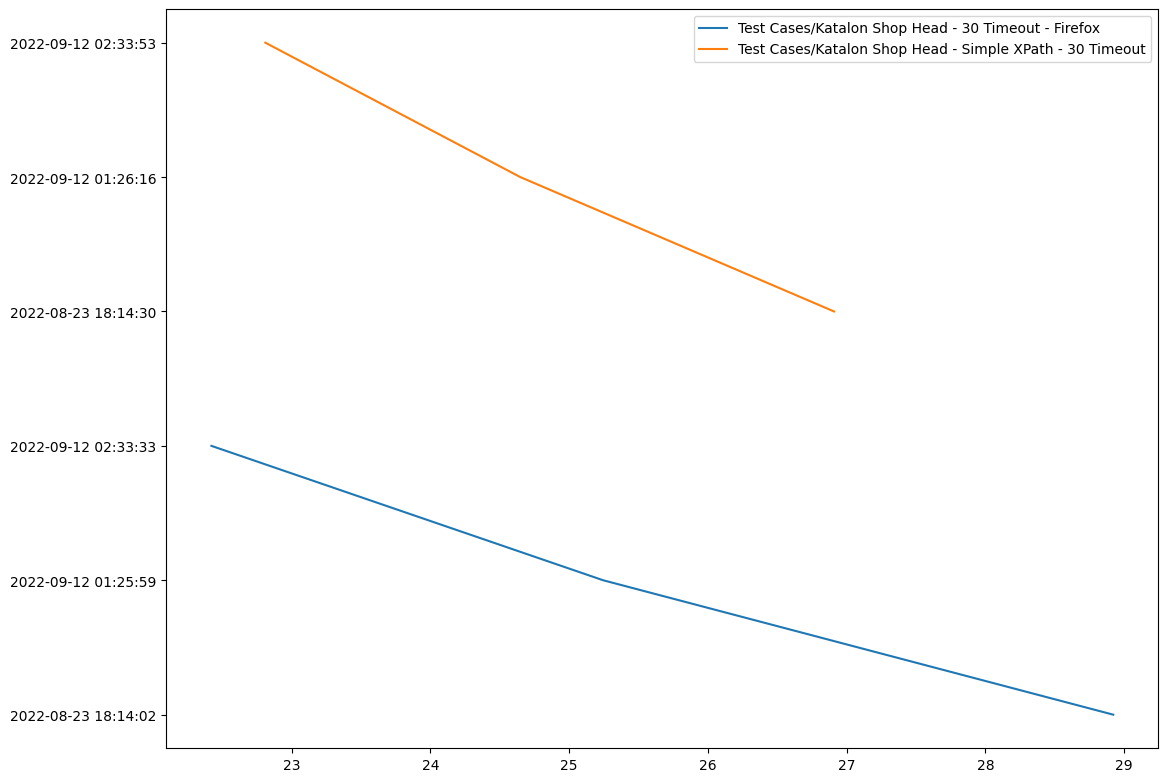

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

zeroTimeOut = accumulatedFrame[accumulatedFrame['Test Case'] == 'Test Cases/Katalon Shop Head - 0 Timeout']
simpleZeroTimeOut = accumulatedFrame[accumulatedFrame['Test Case'] == 'Test Cases/Katalon Shop Head - Simple XPath - 0 Timeout']
variableTimeOut = accumulatedFrame[accumulatedFrame['Test Case'] == 'Test Cases/Katalon Shop Head - Variable Timeout']
simpleVariableTimeOut = accumulatedFrame[accumulatedFrame['Test Case'] == 'Test Cases/Katalon Shop Head - Simple XPath - Variable Timeout']
thirtyTimeOut = accumulatedFrame[accumulatedFrame['Test Case'] == 'Test Cases/Katalon Shop Head - 30 Timeout']
simpleThirtyTimeOut = accumulatedFrame[accumulatedFrame['Test Case'] == 'Test Cases/Katalon Shop Head - Simple XPath - 30 Timeout']

# plt.rcParams["figure.figsize"] = [2 * i for i in plt.rcParams["figure.figsize"]]

zeroTimeOutChrome = zeroTimeOut[zeroTimeOut['Browser'].str.contains('Chrome')]
zeroTimeOutDurationChrome = zeroTimeOutChrome['Duration']
zeroTimeOutStartTimeChrome = zeroTimeOutChrome['Start Time']
plt.plot(zeroTimeOutDurationChrome, zeroTimeOutStartTimeChrome, label='Test Cases/Katalon Shop Head - 0 Timeout - Chrome')

simpleZeroTimeOutChrome = simpleZeroTimeOut[simpleZeroTimeOut['Browser'].str.contains('Chrome')]
simpleZeroTimeOutDurationChrome = simpleZeroTimeOutChrome['Duration']
simpleZeroTimeOutStartTimeChrome = simpleZeroTimeOutChrome['Start Time']
plt.plot(simpleZeroTimeOutDurationChrome, simpleZeroTimeOutStartTimeChrome, label='Test Cases/Katalon Shop Head - Simple XPath - 0 Timeout - Chrome')

plt.legend()
plt.show()

variableTimeOutChrome = variableTimeOut[simpleVariableTimeOut['Browser'].str.contains('Chrome')]
variableTimeOutDurationOutChrome = variableTimeOutChrome['Duration']
variableTimeOutStartTimeOutChrome = variableTimeOutChrome['Start Time']
plt.plot(variableTimeOutDurationOutChrome, variableTimeOutStartTimeOutChrome, label='Test Cases/Katalon Shop Head - Variable Timeout - Chrome')

simpleVariableTimeOutChrome = simpleVariableTimeOut[simpleVariableTimeOut['Browser'].str.contains('Chrome')]
simpleVariableTimeOutDurationOutChrome = simpleVariableTimeOutChrome['Duration']
simpleVariableTimeOutStartTimeOutChrome = simpleVariableTimeOutChrome['Start Time']
plt.plot(simpleVariableTimeOutDurationOutChrome, simpleVariableTimeOutStartTimeOutChrome, label='Test Cases/Katalon Shop Head - Simple XPath - Variable Timeout - Chrome')

plt.legend()
plt.show()

thirtyTimeOutChrome = thirtyTimeOut[thirtyTimeOut['Browser'].str.contains('Chrome')]
thirtyTimeoutDurationChrome = thirtyTimeOutChrome['Duration']
thirtyTimeoutStartTimeChrome = thirtyTimeOutChrome['Start Time']
plt.plot(thirtyTimeoutDurationChrome, thirtyTimeoutStartTimeChrome, label='Test Cases/Katalon Shop Head - 30 Timeout - Chrome')

simpleThirtyTimeOutChrome = simpleThirtyTimeOut[simpleThirtyTimeOut['Browser'].str.contains('Chrome')]
simpleThirtyTimeoutDurationChrome = simpleThirtyTimeOutChrome['Duration']
simpleThirtyTimeoutStartTimeChrome = simpleThirtyTimeOutChrome['Start Time']
plt.plot(simpleThirtyTimeoutDurationChrome, simpleThirtyTimeoutStartTimeChrome, label='Test Cases/Katalon Shop Head - Simple XPath - 30 Timeout - Chrome')

plt.legend()
plt.show()

zeroTimeOutFirefox = zeroTimeOut[zeroTimeOut['Browser'].str.contains('Firefox')]
zeroTimeOutDurationFirefox = zeroTimeOutFirefox['Duration']
zeroTimeOutStartTimeFirefox = zeroTimeOutFirefox['Start Time']
plt.plot(zeroTimeOutDurationFirefox, zeroTimeOutStartTimeFirefox, label='Test Cases/Katalon Shop Head - 0 Timeout - Firefox')

simpleZeroTimeOutFirefox = simpleZeroTimeOut[simpleZeroTimeOut['Browser'].str.contains('Firefox')]
simpleZeroTimeOutDurationFirefox = simpleZeroTimeOutFirefox['Duration']
simpleZeroTimeOutStartTimeFirefox = simpleZeroTimeOutFirefox['Start Time']
plt.plot(simpleZeroTimeOutDurationFirefox, simpleZeroTimeOutStartTimeFirefox, label='Test Cases/Katalon Shop Head - Simple XPath - 0 Timeout - Firefox')

plt.legend()
plt.show()

variableTimeOutFirefox = variableTimeOut[simpleVariableTimeOut['Browser'].str.contains('Firefox')]
variableTimeOutDurationOutFirefox = variableTimeOutFirefox['Duration']
variableTimeOutStartTimeOutFirefox = variableTimeOutFirefox['Start Time']
plt.plot(variableTimeOutDurationOutFirefox, variableTimeOutStartTimeOutFirefox, label='Test Cases/Katalon Shop Head - Variable Timeout - Firefox')

simpleVariableTimeOutFirefox = simpleVariableTimeOut[simpleVariableTimeOut['Browser'].str.contains('Firefox')]
simpleVariableTimeOutDurationOutFirefox = simpleVariableTimeOutFirefox['Duration']
simpleVariableTimeOutStartTimeOutFirefox = simpleVariableTimeOutFirefox['Start Time']
plt.plot(simpleVariableTimeOutDurationOutFirefox, simpleVariableTimeOutStartTimeOutFirefox, label='Test Cases/Katalon Shop Head - Simple XPath - Variable Timeout - Firefox')

plt.legend()
plt.show()

thirtyTimeOutFirefox = thirtyTimeOut[thirtyTimeOut['Browser'].str.contains('Firefox')]
thirtyTimeoutDurationFirefox = thirtyTimeOutFirefox['Duration']
thirtyTimeoutStartTimeFirefox = thirtyTimeOutFirefox['Start Time']
plt.plot(thirtyTimeoutDurationFirefox, thirtyTimeoutStartTimeFirefox, label='Test Cases/Katalon Shop Head - 30 Timeout - Firefox')

simpleThirtyTimeOutFirefox = simpleThirtyTimeOut[simpleThirtyTimeOut['Browser'].str.contains('Firefox')]
simpleThirtyTimeoutDurationFirefox = simpleThirtyTimeOutFirefox['Duration']
simpleThirtyTimeoutStartTimeFirefox = simpleThirtyTimeOutFirefox['Start Time']
plt.plot(simpleThirtyTimeoutDurationFirefox, simpleThirtyTimeoutStartTimeFirefox, label='Test Cases/Katalon Shop Head - Simple XPath - 30 Timeout')

plt.legend()
plt.show()